# CSE 482 Exercise 8 (Date: March 15, 2019)

In this exercise, you will apply anomaly detection and collaborative filtering to real-world datasets. Submit the notebook along with its HTML version via D2L.

**1. Anomaly Detection**

a. Download the dataset named *anomaly.csv* from the class website. In this exercise, you will need to apply scikit-learn anomaly detection algorithm to detect cyberattacks from http traffic. The original data was obtained from http://odds.cs.stonybrook.edu/http-kddcup99-dataset/.  

b. Use pandas to load the file anomaly.csv into a DataFrame object named data. Display the first 5 records of the data object. Note that the last column of the table corresponds to the true class of each http connection (0 means normal traffic and 1 means anomalous traffic, i.e., intrusions).

**Solution:**

In [1]:
import pandas as pd

data = pd.read_csv("anomaly.csv")

data.head()

,Duration,Src_Bytes,Dest_Bytes,Class
0,-2.3026,5.2155,4.8211,0
1,-2.3026,5.0882,8.4181,0
2,-2.3026,5.2938,10.7160,0
3,-2.3026,5.3895,7.1983,0
4,-2.3026,5.3618,9.1649,0


c. Extract the "Class" column into a series object named labels. Remove the "Class" column from the data object.  

In [2]:
labels = data['Class']    # extract the Class column; this will store the true class for each datapoint
data = data.drop('Class', axis = 1)     # remove the Class column

d. Use scikit-learn to detect outliers in the dataset based on the distance to the 100th nearest neighbors of each data instance. Note that in scikit-learn NearestNeighbors(), the 1-nearest neighbor for each data instance is the instance itself, with the distance value being equal to 0. Thus, you must exclude the instance itself when determining the 100th nearest neighbors. Plot a histogram that shows the distance between each data instance to its 100th nearest neighbor. **Note:** Use the default distance metric instead of correlation to determine the nearest neighbors.

**Solution:**

(array([2.8063e+04, 7.6000e+01, 6.6000e+01, 2.8000e+01, 9.5000e+01,
        1.0000e+00, 1.0000e+00, 5.0000e+00, 0.0000e+00, 2.3000e+01]),
 array([ 0.019     ,  1.0789149 ,  2.1388298 ,  3.1987447 ,  4.2586596 ,
         5.3185745 ,  6.3784894 ,  7.4384043 ,  8.49831919,  9.55823409,
        10.61814899]),
 <a list of 10 Patch objects>)

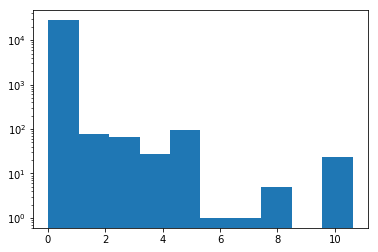

In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

knn = 100
nbrs = NearestNeighbors(n_neighbors=knn+1).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)
ax = plt.axes(yscale='log')
ax.hist(distances[:,knn])

e. Sort the instances in decreasing order of its 100th nearest neighbor distance. Display the top-5 outliers with largest distance to its 100th nearest neighbor.

**Solution:**

In [4]:
outlier = np.flipud(np.argsort(distances[:,knn]))
sort_dist = np.flipud(np.sort(distances[:,knn]))

p = pd.DataFrame(np.column_stack((outlier,sort_dist)),columns=['index','score'])
p.head()

,index,score
0,19297.0,10.618149
1,26789.0,10.618149
2,26829.0,10.618149
3,27212.0,10.618149
4,22879.0,10.618149


f.	Plot the roc curve by passing the true labels and 100th nearest neighbor distance. Calculate the area under ROC curve. (See lecture 10 on ROC curve).

**Solution:**

Area under ROC = 0.9989


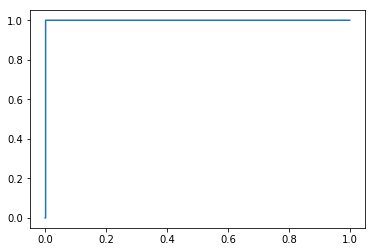

In [5]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

fpr, tpr, thresholds = roc_curve(labels,distances[:,knn] )
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr)
print('Area under ROC = %.4f' % (roc_auc))

**2. Collaborative Filtering and Recommender System**

a.	Download the movie ratings dataset from the class website. This is a subset of the original MovieLens data from https://grouplens.org/datasets/movielens/. 

b.	Use Python surprise to load the file movies.ratings into a DataFrame object named data. Display the first 5 rows of the ratings data.

**Solution:**

In [6]:
from surprise import Dataset
from surprise import Reader

reader = Reader(line_format= 'user item rating' , sep=',', rating_scale=(1,5))
data = Dataset.load_from_file('user_ratings.data', reader = reader)
data.raw_ratings[:5]

[('196', 'Kolya', 3.0, None),
 ('186', 'L.A._Confidential', 3.0, None),
 ('22', 'Heavyweights', 1.0, None),
 ('244', 'Legends_of_the_Fall', 2.0, None),
 ('166', 'Jackie_Brown', 1.0, None)]

c. Divide the data into 50% training and 50% testing using the train_test_split() function. Use the non-negative matrix factorization approach to predict the ratings information. Set the number of latent factors to be 20 and number of epochs to be 200.

**Solution:**

In [7]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size =0.5 )

algo = NMF(n_factors=20, n_epochs=200, random_state=1)
algo.fit(trainset)

d. Apply the algorithm to predict the test set and calculate its performance in terms of both the RMSE and MAE values.

**Solution:**

In [8]:
from surprise import accuracy

pred = algo.test(testset)
accuracy.rmse(pred), accuracy.mae(pred)

RMSE: 0.9865
MAE:  0.7751


(0.9865299172507848, 0.7750765190287339)

e. Display the first 10 rows of the test set predictions. 

**Solution:**

In [9]:
for i in range(10):
    print( pred[i])

user: 114        item: Blues_Brothers r_ui = 3.00   est = 2.94   {'was_impossible': False}
user: 846        item: Wyatt_Earp r_ui = 4.00   est = 2.83   {'was_impossible': False}
user: 90         item: American_President r_ui = 4.00   est = 4.05   {'was_impossible': False}
user: 829        item: Four_Weddings_and_a_Funeral r_ui = 4.00   est = 3.30   {'was_impossible': False}
user: 503        item: Reservoir_Dogs r_ui = 1.00   est = 3.91   {'was_impossible': False}
user: 467        item: Men_in_Black r_ui = 4.00   est = 3.73   {'was_impossible': False}
user: 503        item: Heavenly_Creatures r_ui = 5.00   est = 3.36   {'was_impossible': False}
user: 846        item: Godfather:_Part_II r_ui = 4.00   est = 3.87   {'was_impossible': False}
user: 130        item: Face/Off   r_ui = 5.00   est = 4.19   {'was_impossible': False}
user: 551        item: Forrest_Gump r_ui = 4.00   est = 3.91   {'was_impossible': False}
